In [1]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [2]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [3]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [4]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [5]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [6]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [7]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [8]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [9]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [10]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [11]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [12]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [13]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [14]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [15]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [16]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [17]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [18]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [21]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [22]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [23]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predictions, title):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Entailment', 'Neutral', 'Contradiction'], yticklabels=['Entailment', 'Neutral', 'Contradiction'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()


In [42]:
from sklearn.metrics import accuracy_score

# Example using accuracy as the metric
def calculate_model_accuracy(df, model_preds, true_labels):
    return accuracy_score(df[true_labels], df[model_preds])

# Assuming predictions are already in the dataframe
# Calculate accuracy for each model on each dataset
deberta_accuracy_snli = calculate_model_accuracy(combined_snli_df, 'Deberta_Prediction', 'True_Label')
roberta_accuracy_snli = calculate_model_accuracy(combined_snli_df, 'Roberta_Prediction', 'True_Label')
albert_accuracy_snli = calculate_model_accuracy(combined_snli_df, 'Albert_Prediction', 'True_Label')

# Print accuracies
print(f"Deberta Accuracy on SNLI: {deberta_accuracy_snli:.2%}")
print(f"Roberta Accuracy on SNLI: {roberta_accuracy_snli:.2%}")
print(f"Albert Accuracy on SNLI: {albert_accuracy_snli:.2%}")

Deberta Accuracy on SNLI: 28.63%
Roberta Accuracy on SNLI: 91.85%
Albert Accuracy on SNLI: 91.89%


In [44]:
# Normalize these accuracies to sum to 1 for use as weights
total_accuracy_snli = deberta_accuracy_snli + roberta_accuracy_snli + albert_accuracy_snli
weights_snli = {
    'Deberta': deberta_accuracy_snli / total_accuracy_snli,
    'Roberta': roberta_accuracy_snli / total_accuracy_snli,
    'Albert': albert_accuracy_snli / total_accuracy_snli
}

print("Weights for SNLI:", weights_snli)


Weights for SNLI: {'Deberta': 0.13483199923309205, 'Roberta': 0.43248813689306426, 'Albert': 0.4326798638738436}


In [46]:
def weighted_majority_vote(row, weights):
    # Initialize votes dictionary with integer keys
    votes = {0: 0, 1: 0, 2: 0}  # Assuming 0, 1, 2 are the classes as integers
    
    # Accumulate weights for each model's prediction
    # Ensure the predictions are integers
    votes[int(row['Deberta_Prediction'])] += weights['Deberta']
    votes[int(row['Roberta_Prediction'])] += weights['Roberta']
    votes[int(row['Albert_Prediction'])] += weights['Albert']
    
    # Return the class with the highest weighted sum
    return max(votes, key=votes.get)

# Convert predictions to integers if necessary
combined_snli_df['Deberta_Prediction'] = combined_snli_df['Deberta_Prediction'].astype(int)
combined_snli_df['Roberta_Prediction'] = combined_snli_df['Roberta_Prediction'].astype(int)
combined_snli_df['Albert_Prediction'] = combined_snli_df['Albert_Prediction'].astype(int)

# Apply the weighted voting to the SNLI dataset
combined_snli_df['Weighted_Ensemble_Prediction'] = combined_snli_df.apply(lambda row: weighted_majority_vote(row, weights_snli), axis=1)


# Calculate the new accuracy with weighted votes
weighted_accuracy_snli = calculate_model_accuracy(combined_snli_df, 'Weighted_Ensemble_Prediction', 'True_Label')
print(f"Weighted Voting Accuracy for SNLI: {weighted_accuracy_snli:.2%}")


Weighted Voting Accuracy for SNLI: 91.71%


Weighted Voting Accuracy for MNLI Matched: 89.90%


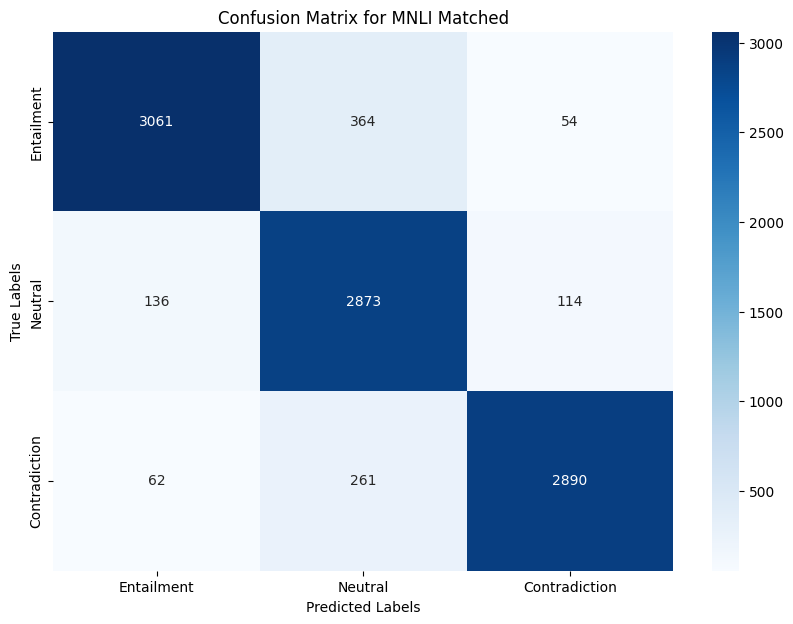

In [51]:
# Convert predictions to integers if not already
combined_mnli_matched_df['Deberta_Prediction'] = combined_mnli_matched_df['Deberta_Prediction'].astype(int)
combined_mnli_matched_df['Roberta_Prediction'] = combined_mnli_matched_df['Roberta_Prediction'].astype(int)
combined_mnli_matched_df['Albert_Prediction'] = combined_mnli_matched_df['Albert_Prediction'].astype(int)

# Apply the weighted voting to the MNLI Matched dataset
combined_mnli_matched_df['Weighted_Ensemble_Prediction'] = combined_mnli_matched_df.apply(lambda row: weighted_majority_vote(row, weights_snli), axis=1)

# Calculate the new accuracy with weighted votes for MNLI Matched
weighted_accuracy_mnli_matched = calculate_model_accuracy(combined_mnli_matched_df, 'Weighted_Ensemble_Prediction', 'True_Label')
print(f"Weighted Voting Accuracy for MNLI Matched: {weighted_accuracy_mnli_matched:.2%}")

# Plot the confusion matrix
plot_confusion_matrix(combined_mnli_matched_df['True_Label'], combined_mnli_matched_df['Weighted_Ensemble_Prediction'], 'Confusion Matrix for MNLI Matched')

Weighted Voting Accuracy for MNLI Mismatched: 90.10%


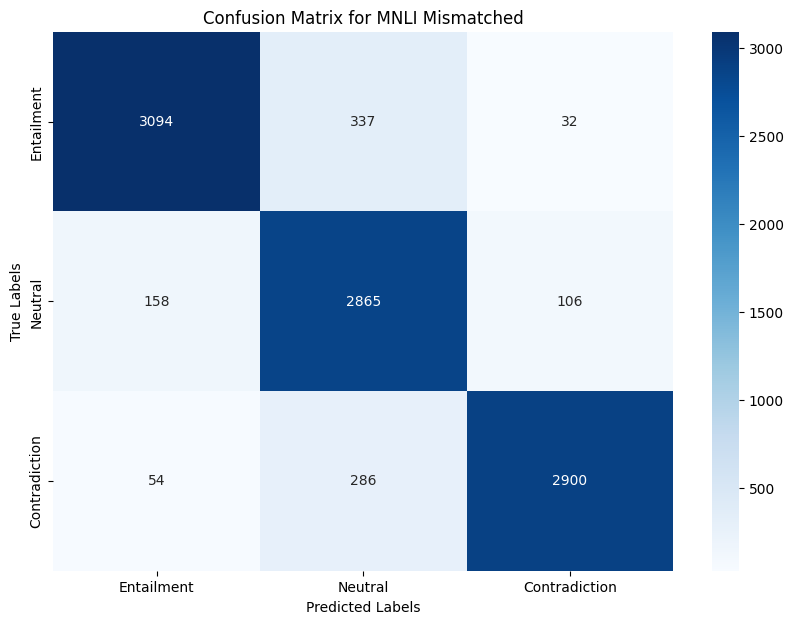

In [52]:
# Convert predictions to integers
combined_mnli_mismatched_df['Deberta_Prediction'] = combined_mnli_mismatched_df['Deberta_Prediction'].astype(int)
combined_mnli_mismatched_df['Roberta_Prediction'] = combined_mnli_mismatched_df['Roberta_Prediction'].astype(int)
combined_mnli_mismatched_df['Albert_Prediction'] = combined_mnli_mismatched_df['Albert_Prediction'].astype(int)

# Apply the weighted voting to MNLI Mismatched
combined_mnli_mismatched_df['Weighted_Ensemble_Prediction'] = combined_mnli_mismatched_df.apply(lambda row: weighted_majority_vote(row, weights_snli), axis=1)

# Calculate the new accuracy with weighted votes for MNLI Mismatched
weighted_accuracy_mnli_mismatched = calculate_model_accuracy(combined_mnli_mismatched_df, 'Weighted_Ensemble_Prediction', 'True_Label')
print(f"Weighted Voting Accuracy for MNLI Mismatched: {weighted_accuracy_mnli_mismatched:.2%}")

# Plot the confusion matrix
plot_confusion_matrix(combined_mnli_mismatched_df['True_Label'], combined_mnli_mismatched_df['Weighted_Ensemble_Prediction'], 'Confusion Matrix for MNLI Mismatched')


Weighted Voting Accuracy for ANLI Round 1: 69.40%


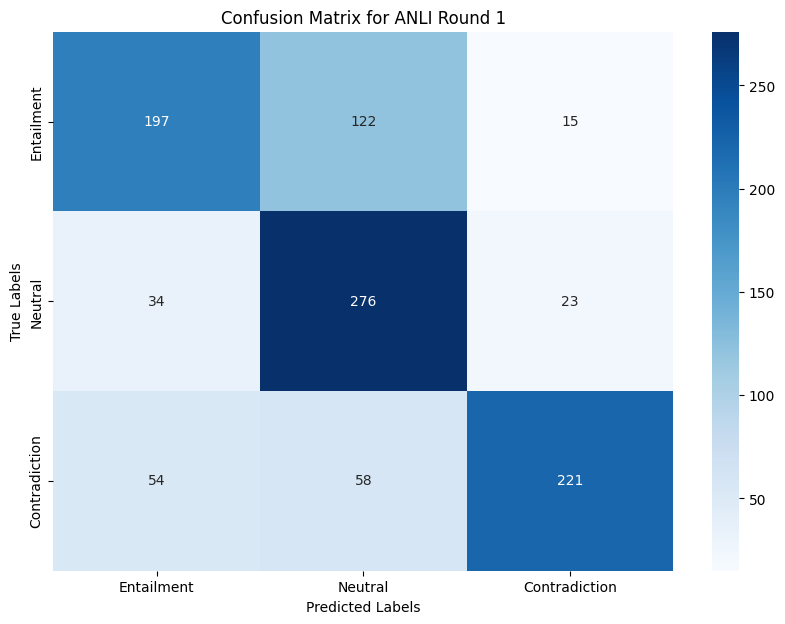

In [53]:
# Convert predictions to integers
combined_anli_r1_df['Deberta_Prediction'] = combined_anli_r1_df['Deberta_Prediction'].astype(int)
combined_anli_r1_df['Roberta_Prediction'] = combined_anli_r1_df['Roberta_Prediction'].astype(int)
combined_anli_r1_df['Albert_Prediction'] = combined_anli_r1_df['Albert_Prediction'].astype(int)

# Apply weighted voting
combined_anli_r1_df['Weighted_Ensemble_Prediction'] = combined_anli_r1_df.apply(lambda row: weighted_majority_vote(row, weights_snli), axis=1)

# Calculate the new accuracy with weighted votes
weighted_accuracy_anli_r1 = calculate_model_accuracy(combined_anli_r1_df, 'Weighted_Ensemble_Prediction', 'True_Label')
print(f"Weighted Voting Accuracy for ANLI Round 1: {weighted_accuracy_anli_r1:.2%}")

# Plot the confusion matrix
plot_confusion_matrix(combined_anli_r1_df['True_Label'], combined_anli_r1_df['Weighted_Ensemble_Prediction'], 'Confusion Matrix for ANLI Round 1')


Weighted Voting Accuracy for ANLI Round 2: 58.50%


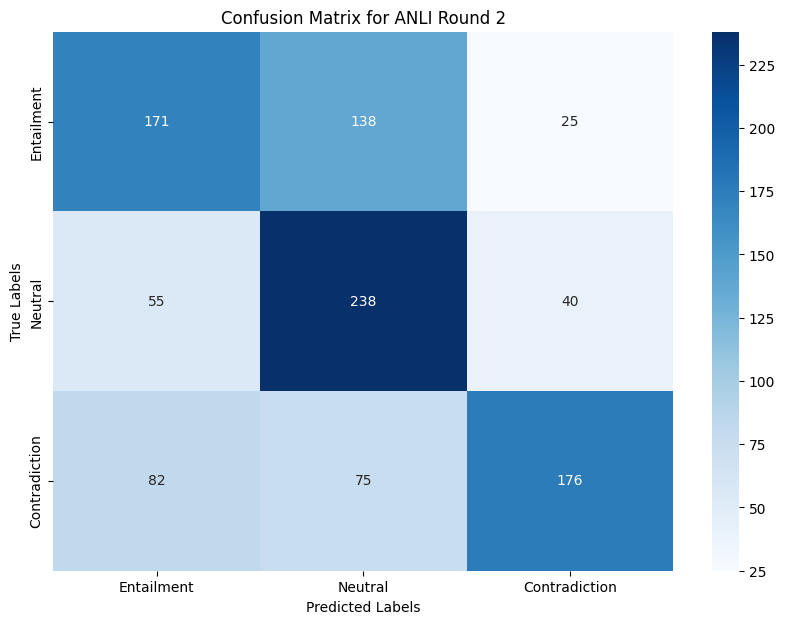

In [54]:
# Convert predictions to integers
combined_anli_r2_df['Deberta_Prediction'] = combined_anli_r2_df['Deberta_Prediction'].astype(int)
combined_anli_r2_df['Roberta_Prediction'] = combined_anli_r2_df['Roberta_Prediction'].astype(int)
combined_anli_r2_df['Albert_Prediction'] = combined_anli_r2_df['Albert_Prediction'].astype(int)

# Apply weighted voting
combined_anli_r2_df['Weighted_Ensemble_Prediction'] = combined_anli_r2_df.apply(lambda row: weighted_majority_vote(row, weights_snli), axis=1)

# Calculate the new accuracy with weighted votes
weighted_accuracy_anli_r2 = calculate_model_accuracy(combined_anli_r2_df, 'Weighted_Ensemble_Prediction', 'True_Label')
print(f"Weighted Voting Accuracy for ANLI Round 2: {weighted_accuracy_anli_r2:.2%}")

# Plot the confusion matrix
plot_confusion_matrix(combined_anli_r2_df['True_Label'], combined_anli_r2_df['Weighted_Ensemble_Prediction'], 'Confusion Matrix for ANLI Round 2')


Weighted Voting Accuracy for ANLI Round 3: 58.00%


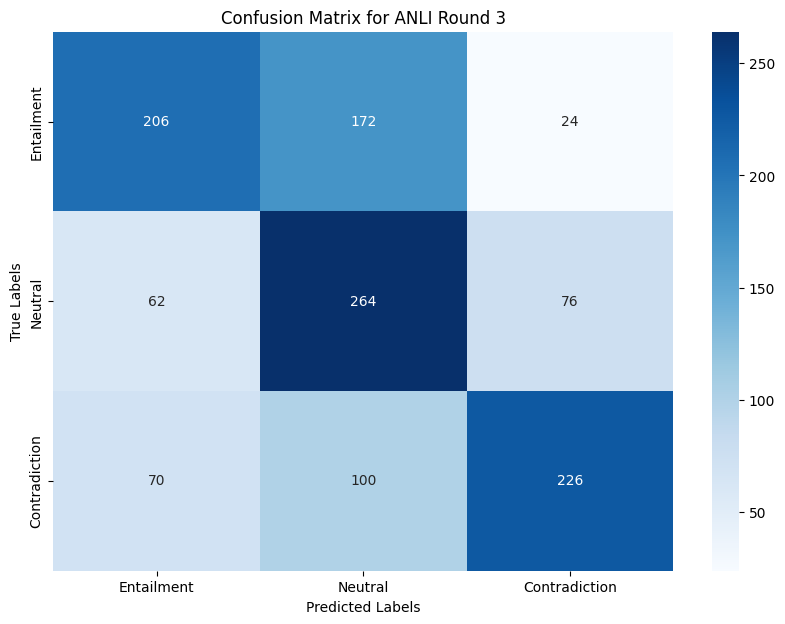

In [55]:
# Convert predictions to integers
combined_anli_r3_df['Deberta_Prediction'] = combined_anli_r3_df['Deberta_Prediction'].astype(int)
combined_anli_r3_df['Roberta_Prediction'] = combined_anli_r3_df['Roberta_Prediction'].astype(int)
combined_anli_r3_df['Albert_Prediction'] = combined_anli_r3_df['Albert_Prediction'].astype(int)

# Apply weighted voting
combined_anli_r3_df['Weighted_Ensemble_Prediction'] = combined_anli_r3_df.apply(lambda row: weighted_majority_vote(row, weights_snli), axis=1)

# Calculate the new accuracy with weighted votes
weighted_accuracy_anli_r3 = calculate_model_accuracy(combined_anli_r3_df, 'Weighted_Ensemble_Prediction', 'True_Label')
print(f"Weighted Voting Accuracy for ANLI Round 3: {weighted_accuracy_anli_r3:.2%}")

# Plot the confusion matrix
plot_confusion_matrix(combined_anli_r3_df['True_Label'], combined_anli_r3_df['Weighted_Ensemble_Prediction'], 'Confusion Matrix for ANLI Round 3')


Weights for Combined Dataset: {'Deberta': 0.13939093463139077, 'Roberta': 0.4293354967623684, 'Albert': 0.4312735686062409}
Weighted Voting Accuracy for Combined Dataset: 87.95%


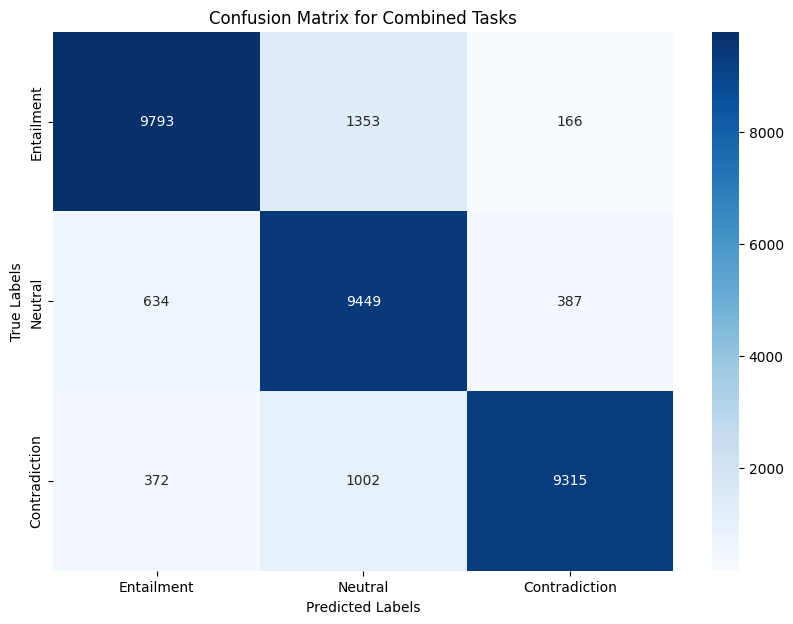

In [60]:
# Step 1: Combine all tasks
combined_df = pd.concat([combined_snli_df, combined_mnli_matched_df,combined_mnli_mismatched_df,combined_anli_r1_df,combined_anli_r2_df, combined_anli_r2_df], ignore_index=True)

# Step 2: Calculate model accuracies on the combined dataset
combined_accuracy_deberta = calculate_model_accuracy(combined_df, 'Deberta_Prediction', 'True_Label')
combined_accuracy_roberta = calculate_model_accuracy(combined_df, 'Roberta_Prediction', 'True_Label')
combined_accuracy_albert = calculate_model_accuracy(combined_df, 'Albert_Prediction', 'True_Label')

# Step 3: Normalize accuracies to sum to 1 for each model
total_accuracy_combined = combined_accuracy_deberta + combined_accuracy_roberta + combined_accuracy_albert
weights_combined = {
    'Deberta': combined_accuracy_deberta / total_accuracy_combined,
    'Roberta': combined_accuracy_roberta / total_accuracy_combined,
    'Albert': combined_accuracy_albert / total_accuracy_combined
}

print("Weights for Combined Dataset:", weights_combined)

# Step 4: Apply weighted voting to the combined dataset
combined_df['Weighted_Ensemble_Prediction'] = combined_df.apply(lambda row: weighted_majority_vote(row, weights_combined), axis=1)

# Step 5: Calculate the new accuracy with weighted votes on the combined dataset
weighted_accuracy_combined = calculate_model_accuracy(combined_df, 'Weighted_Ensemble_Prediction', 'True_Label')
print(f"Weighted Voting Accuracy for Combined Dataset: {weighted_accuracy_combined:.2%}")


# Plot the confusion matrix
plot_confusion_matrix(combined_df['True_Label'], combined_df['Weighted_Ensemble_Prediction'], 'Confusion Matrix for Combined Tasks')
